## Import Libraries

In [1]:
# importing libraries

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Dataset_BUSI_with_GT/Features.csv')

In [3]:
data.head()

,gray_mean,gray_std_dev,adaptive_mean,adaptive_std_dev,clahe_mean,clahe_std_dev,sobel_std_dev,sobel_mean,er_mean,er_std_dev,...,Histeq_std,dl_mean,dl_std_dev,Entropy,Energy,Correlation,Dissimilarity,Homogenity,Contrast,label
0,78.500854,46.769680,50.380066,58.775748,113.273254,60.830760,579.773146,29.973022,43.803528,23.073971,...,73.401876,113.841125,62.137629,156.786479,0.017177,0.964083,8.811454,0.131086,156.786479,normal
1,50.696167,50.380796,31.761902,52.855543,89.535400,60.694865,540.303759,6.729187,23.876221,31.567407,...,73.076011,74.864868,62.560576,135.834154,0.032523,0.973272,8.099286,0.156050,135.834154,normal
2,103.656738,51.219374,85.202637,65.242512,123.229858,64.011365,750.489685,-24.112610,61.083130,37.510963,...,73.607790,142.900391,56.678783,238.783526,0.014268,0.954311,10.636626,0.105213,238.783526,normal
3,62.507629,36.060182,20.259460,40.648578,108.470825,61.673364,614.394093,-27.587036,31.947510,17.353388,...,73.377197,97.913635,50.605540,168.789001,0.020592,0.935090,8.634104,0.139739,168.789001,normal
4,127.308716,47.649705,114.935547,61.220481,126.263550,64.205135,681.411752,25.564270,83.759521,36.407759,...,73.656231,165.376404,50.941977,194.504675,0.014478,0.957096,10.245448,0.105215,194.504675,normal


In [4]:
# check the features,Non-null count and Dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gray_mean         780 non-null    float64
 1   gray_std_dev      780 non-null    float64
 2   adaptive_mean     780 non-null    float64
 3   adaptive_std_dev  780 non-null    float64
 4   clahe_mean        780 non-null    float64
 5   clahe_std_dev     780 non-null    float64
 6   sobel_std_dev     780 non-null    float64
 7   sobel_mean        780 non-null    float64
 8   er_mean           780 non-null    float64
 9   er_std_dev        780 non-null    float64
 10  Histeq_mean       780 non-null    float64
 11  Histeq_std        780 non-null    float64
 12  dl_mean           780 non-null    float64
 13  dl_std_dev        780 non-null    float64
 14  Entropy           780 non-null    float64
 15  Energy            780 non-null    float64
 16  Correlation       780 non-null    float64
 1

In [5]:
## finding the features mean, std,min and max
data.describe()

,gray_mean,gray_std_dev,adaptive_mean,adaptive_std_dev,clahe_mean,clahe_std_dev,sobel_std_dev,sobel_mean,er_mean,er_std_dev,Histeq_mean,Histeq_std,dl_mean,dl_std_dev,Entropy,Energy,Correlation,Dissimilarity,Homogenity,Contrast
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,84.765208,52.890879,61.958817,63.248739,111.811934,62.616495,664.892254,4.806492,49.398302,35.212729,128.481883,72.950791,118.344103,62.869195,183.129016,0.033085,0.964124,8.856170,0.149656,183.129016
std,19.659784,8.368976,23.962888,9.771741,10.737505,3.379879,111.532125,27.939163,16.180870,8.983311,1.910380,2.234217,22.994065,9.364539,62.708554,0.046143,0.018331,1.413543,0.051248,62.708554
min,35.513428,32.290799,4.414124,20.681966,66.819397,52.943908,331.502165,-114.169495,8.727844,12.583008,118.381104,46.962254,58.447327,36.683310,33.485236,0.012952,0.888331,3.954847,0.087859,33.485236
25%,71.741364,46.796348,44.675156,58.261350,106.982971,60.430474,590.052428,-12.952148,37.557587,28.921831,128.099838,73.204000,103.572647,56.202733,143.444574,0.015728,0.954543,7.980623,0.120910,143.444574
50%,84.265167,52.750538,60.951324,63.631873,113.548950,62.430465,654.897669,3.623993,48.327972,35.161616,128.259338,73.414133,118.282959,63.362553,173.986928,0.018209,0.968599,8.802873,0.135639,173.986928
75%,98.525787,59.149852,79.932632,70.082571,119.365295,64.648371,733.164237,22.729813,60.641541,41.419275,128.432602,73.555955,134.320602,69.615725,212.858775,0.025962,0.977564,9.765102,0.159160,212.858775
max,169.523865,75.082079,168.797119,87.597034,130.374084,73.200720,1040.223483,96.741272,120.181274,60.875059,153.461975,78.364629,212.369446,85.731138,426.922367,0.440867,0.994941,13.706201,0.505440,426.922367


            Target Variable Distribution           


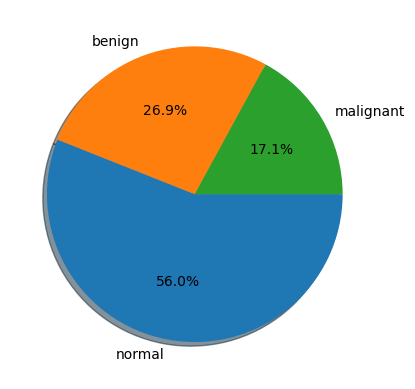

In [6]:
#Let us first analyze the distribution of the target variable
target = 'label'
labels = ['normal', 'benign','malignant']
features = [i for i in data.columns.values if i not in [target]]
MAP={}
for e, i in enumerate(sorted(data[target].unique())):
    MAP[i]=labels[e]

data1 = data.copy()
data1[target]=data1[target].map(MAP)
explode=np.zeros(len(labels))
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(data1[target].value_counts(),
        labels=data1[target].value_counts().index,
        counterclock=False,
        shadow=True,
        autopct='%1.1f%%',
        radius=1,
        startangle=0)
plt.show()

                                     Features Distribution                                      


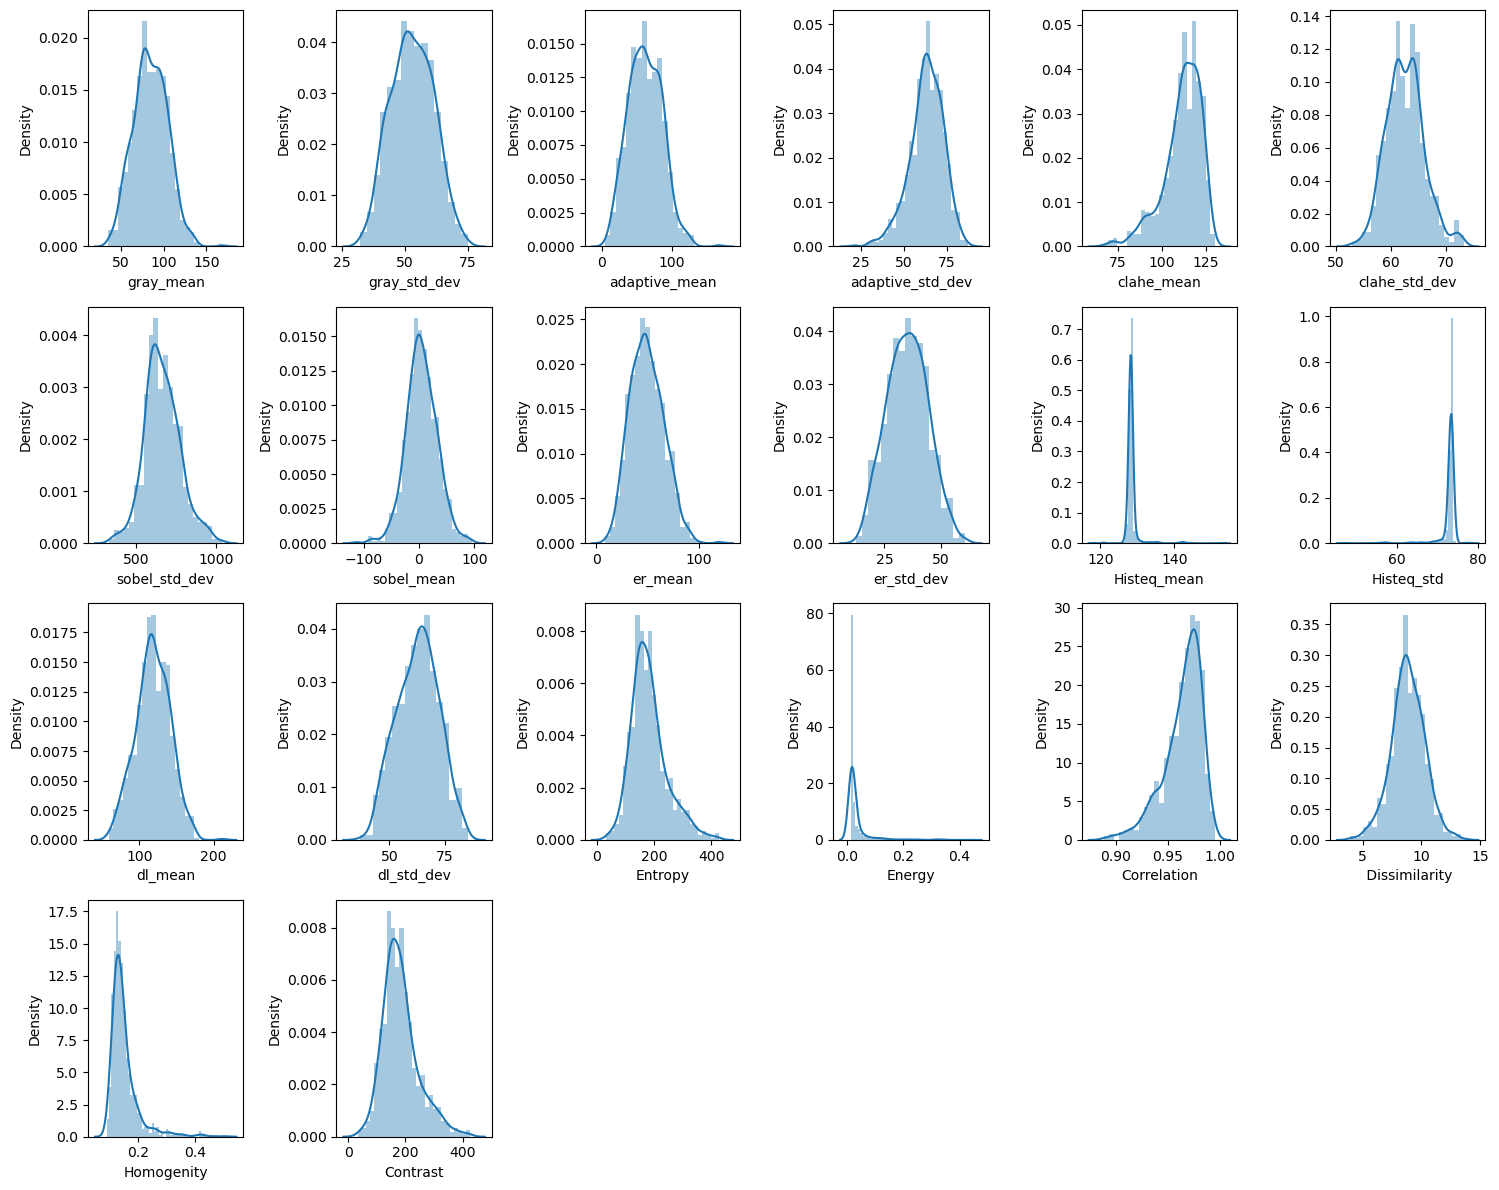

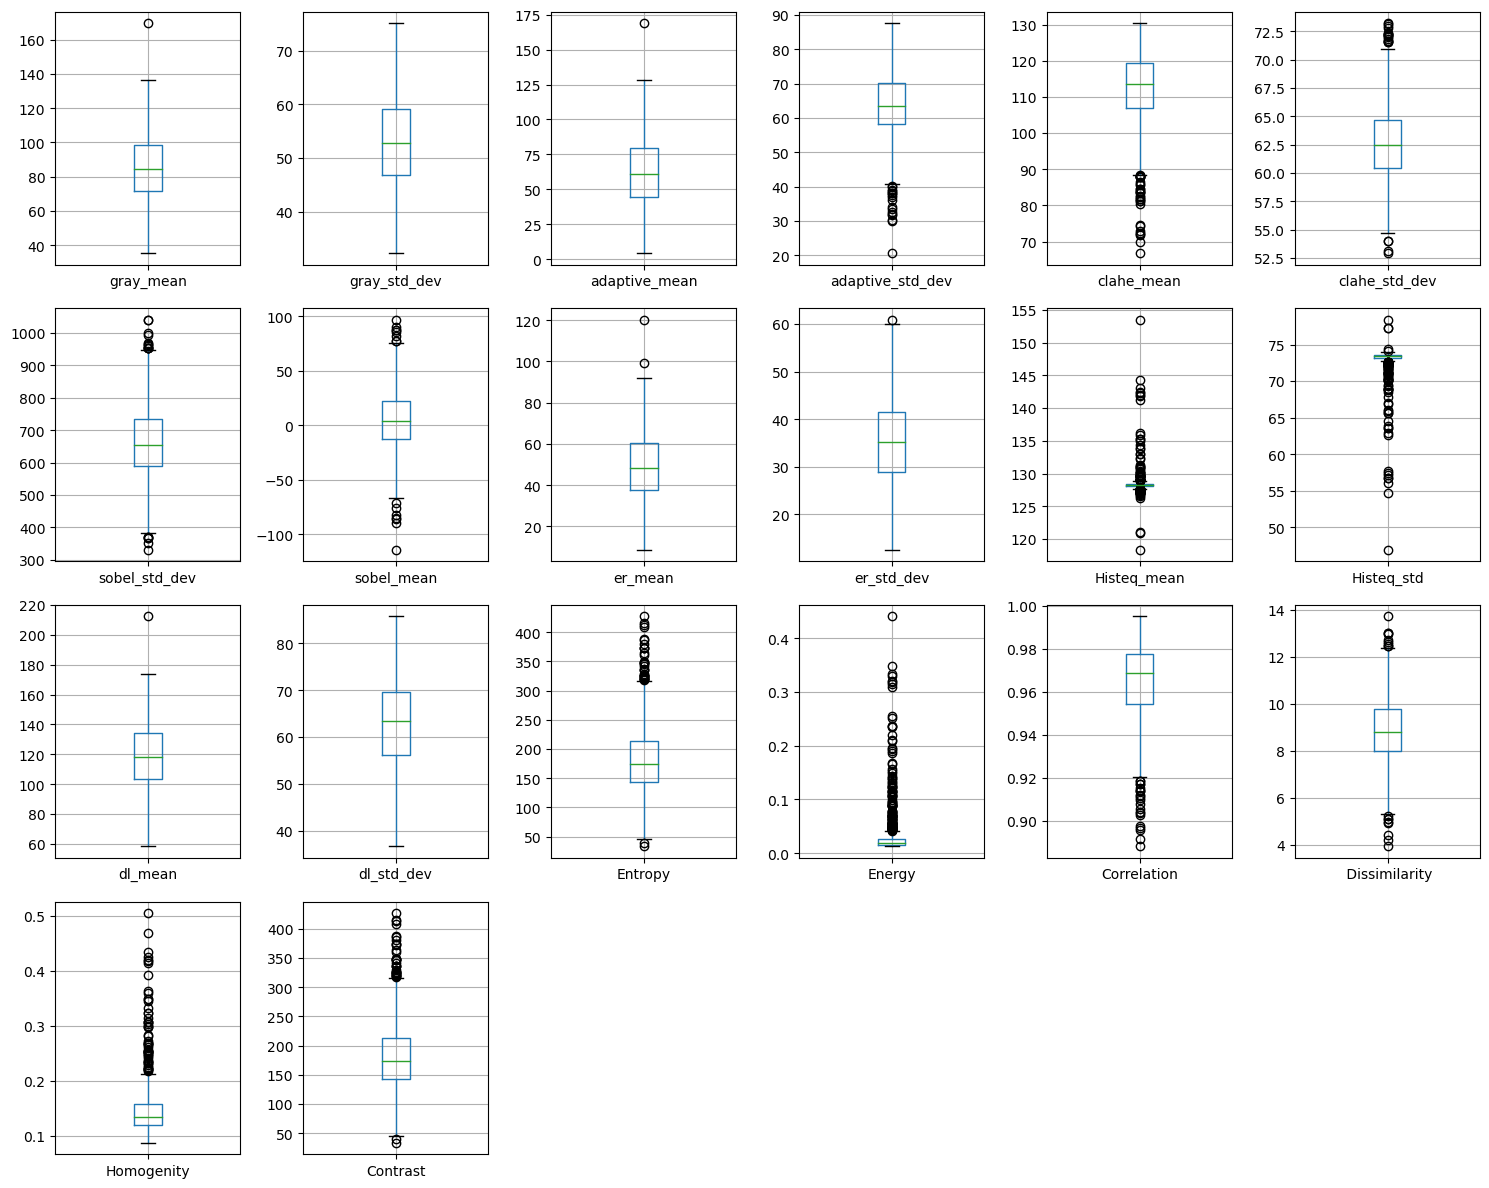

In [7]:
print('\033[1mFeatures Distribution'.center(100))
cf = []
#Checking number of unique rows in each feature

nu = data[features].nunique().sort_values()
nf = []
nnf = 0 # numerical features
ncf = 0 # categorical features

for i in range(data[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])
for i in range(data[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])
n=6
nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    sns.distplot(data[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    data.boxplot(nf[c])
plt.tight_layout()
plt.show()

In [8]:
#Check for empty elements
nvc = pd.DataFrame(data1.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/data1.shape[0],3)*100
print(nvc)

                  Total Null Values  Percentage
gray_mean                         0         0.0
Homogenity                        0         0.0
 Dissimilarity                    0         0.0
Correlation                       0         0.0
Energy                            0         0.0
Entropy                           0         0.0
dl_std_dev                        0         0.0
dl_mean                           0         0.0
Histeq_std                        0         0.0
Contrast                          0         0.0
Histeq_mean                       0         0.0
er_mean                           0         0.0
sobel_mean                        0         0.0
sobel_std_dev                     0         0.0
clahe_std_dev                     0         0.0
clahe_mean                        0         0.0
adaptive_std_dev                  0         0.0
adaptive_mean                     0         0.0
gray_std_dev                      0         0.0
er_std_dev                        0     

In [9]:
#Splitting the data intro training & testing sets
data = data1.copy()
X = data.drop([target],axis=1)
Y = data[target]
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=15)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',x_train.shape,y_train.shape,'\nTesting set   ---> ', x_test.shape, y_test.shape)

Original set  --->  (780, 20) (780,) 
Training set  --->  (624, 20) (624,) 
Testing set   --->  (156, 20) (156,)


In [10]:
# Feature Scaling (Standardization)
std = StandardScaler()
print('\033[1mStandardardization on Training set'.center(55))
x_train = std.fit_transform(x_train)
X_train = pd.DataFrame(x_train, columns=X.columns)
display(X_train.describe())

print('\n','\033[1mStandardardization on Testing set'.center(55))
x_test = std.transform(x_test)
X_test = pd.DataFrame(x_test, columns=X.columns)
display(X_test.describe())

         Standardardization on Training set        


,gray_mean,gray_std_dev,adaptive_mean,adaptive_std_dev,clahe_mean,clahe_std_dev,sobel_std_dev,sobel_mean,er_mean,er_std_dev,Histeq_mean,Histeq_std,dl_mean,dl_std_dev,Entropy,Energy,Correlation,Dissimilarity,Homogenity,Contrast
count,6.240000e+02,6.240000e+02,6.240000e+02,6.240000e+02,6.240000e+02,6.240000e+02,6.240000e+02,6.240000e+02,6.240000e+02,6.240000e+02,6.240000e+02,6.240000e+02,6.240000e+02,6.240000e+02,6.240000e+02,6.240000e+02,6.240000e+02,6.240000e+02,6.240000e+02,6.240000e+02
mean,2.277381e-16,-1.104530e-15,3.131398e-17,5.807320e-16,-5.351844e-16,-5.693451e-16,-3.529940e-16,8.540177e-18,6.832142e-17,-1.878839e-16,3.808919e-15,3.028916e-15,1.423363e-16,1.071792e-15,-2.618988e-16,-1.423363e-16,-4.312789e-16,-1.337961e-16,-4.270089e-18,-2.618988e-16
std,1.000802e+00,1.000802e+00,1.000802e+00,1.000802e+00,1.000802e+00,1.000802e+00,1.000802e+00,1.000802e+00,1.000802e+00,1.000802e+00,1.000802e+00,1.000802e+00,1.000802e+00,1.000802e+00,1.000802e+00,1.000802e+00,1.000802e+00,1.000802e+00,1.000802e+00,1.000802e+00
min,-2.473175e+00,-2.462484e+00,-2.374362e+00,-4.336729e+00,-4.197943e+00,-2.856503e+00,-2.961227e+00,-4.320724e+00,-2.256663e+00,-2.528967e+00,-5.141602e+00,-1.141040e+01,-2.578602e+00,-2.773191e+00,-2.356326e+00,-4.381998e-01,-4.108085e+00,-3.409457e+00,-1.210719e+00,-2.356326e+00
25%,-6.538339e-01,-6.994129e-01,-7.207017e-01,-5.180811e-01,-4.461602e-01,-6.541075e-01,-6.751379e-01,-6.428495e-01,-7.284856e-01,-7.018268e-01,-1.959782e-01,1.127695e-01,-6.360119e-01,-6.904702e-01,-6.363398e-01,-3.778892e-01,-5.220908e-01,-6.048472e-01,-5.617120e-01,-6.363398e-01
50%,-3.162705e-02,-1.512848e-02,-4.612449e-02,4.615582e-02,1.379762e-01,-6.277476e-02,-9.131989e-02,-2.127113e-02,-7.179236e-02,-7.926391e-03,-1.109119e-01,2.037468e-01,-7.481092e-03,5.873762e-02,-1.293582e-01,-3.204971e-01,2.329748e-01,-3.016875e-02,-2.738050e-01,-1.293582e-01
75%,6.864395e-01,7.352505e-01,7.279456e-01,6.863930e-01,7.114765e-01,5.922684e-01,5.881255e-01,6.398658e-01,6.724140e-01,6.770247e-01,-2.434600e-02,2.676553e-01,6.888393e-01,7.235052e-01,4.358906e-01,-1.533847e-01,7.435493e-01,6.562003e-01,1.974143e-01,4.358906e-01
max,4.245322e+00,2.642591e+00,4.392367e+00,2.482292e+00,1.738864e+00,3.110140e+00,3.374077e+00,3.070801e+00,4.287941e+00,2.842145e+00,1.272216e+01,2.379419e+00,4.040984e+00,2.413309e+00,3.879697e+00,8.704101e+00,1.657582e+00,3.426440e+00,6.845800e+00,3.879697e+00



          Standardardization on Testing set         


,gray_mean,gray_std_dev,adaptive_mean,adaptive_std_dev,clahe_mean,clahe_std_dev,sobel_std_dev,sobel_mean,er_mean,er_std_dev,Histeq_mean,Histeq_std,dl_mean,dl_std_dev,Entropy,Energy,Correlation,Dissimilarity,Homogenity,Contrast
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,-0.019900,-0.024290,-0.027843,0.005320,0.024628,-0.037216,0.094838,0.162723,-0.051637,-0.060282,0.009416,0.010122,-0.013384,-0.020990,0.077725,-0.040227,-0.045291,0.132349,-0.092226,0.077725
std,0.925332,0.991862,0.929399,0.978673,1.014836,0.976826,0.981108,1.097779,0.907882,0.994184,0.854526,0.901064,0.942735,0.949754,0.966636,0.925929,0.955002,0.946077,0.938443,0.966636
min,-2.353694,-2.282153,-2.116585,-3.343630,-3.620904,-2.346614,-2.647216,-3.422024,-2.480025,-2.305439,-0.730898,-6.959169,-2.094188,-1.981702,-1.906032,-0.423663,-3.176386,-2.601403,-1.133562,-1.906032
25%,-0.681473,-0.764017,-0.670823,-0.480670,-0.445644,-0.608910,-0.528267,-0.431544,-0.783107,-0.746308,-0.181891,0.118684,-0.659936,-0.772418,-0.552294,-0.385683,-0.566978,-0.447542,-0.614166,-0.552294
50%,-0.026763,-0.042250,-0.053147,0.032844,0.244348,-0.054048,0.043299,0.119439,-0.157544,-0.065873,-0.112948,0.210343,0.006995,0.000868,-0.131636,-0.343120,0.233094,0.099742,-0.363766,-0.131636
75%,0.685895,0.788398,0.749883,0.742783,0.692244,0.572460,0.771473,0.854140,0.673861,0.710046,-0.013173,0.270566,0.658687,0.580118,0.573361,-0.212599,0.619492,0.667628,0.070887,0.573361
max,1.843834,2.075178,1.991513,1.953771,1.377910,2.797309,3.017496,3.396390,1.710425,2.029710,6.919007,0.443444,2.070585,2.113448,3.584840,6.143102,1.517699,2.933190,5.158474,3.584840


Test Accuracy Score of Basic Logistics Regression: 70.51
              precision    recall  f1-score   support

      benign       0.70      0.65      0.68        40
   malignant       0.59      0.36      0.44        28
      normal       0.73      0.84      0.78        88

    accuracy                           0.71       156
   macro avg       0.67      0.62      0.63       156
weighted avg       0.70      0.71      0.69       156



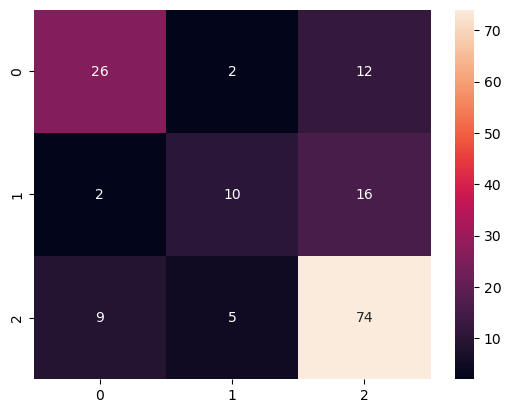

In [11]:
## Applying Logistic Regression Algorithm 
model1 = LogisticRegression(random_state=0)
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
test_accuracy1 = round(accuracy_score(y_test, y_pred1) * 100, 2)
print('Test Accuracy Score of Basic Logistics Regression:',test_accuracy1)
conf1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(conf1, annot=True)
print(classification_report(y_test,y_pred1))

Test Accuracy Random Forest is : 70.51
              precision    recall  f1-score   support

      benign       0.72      0.45      0.55        40
   malignant       0.93      0.46      0.62        28
      normal       0.69      0.92      0.79        88

    accuracy                           0.72       156
   macro avg       0.78      0.61      0.65       156
weighted avg       0.74      0.72      0.70       156



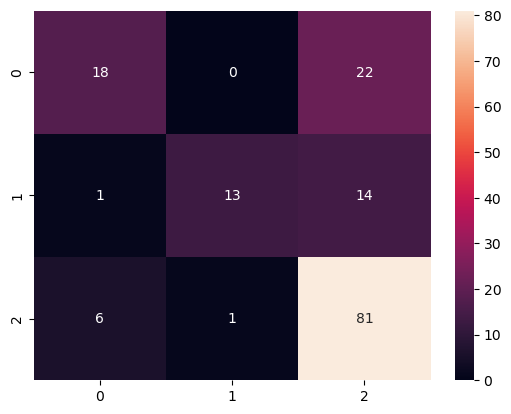

In [12]:
## Applying Random Forest Algorithm
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
y_pred2 = model.predict(x_test)
test_accuracy2 = round(accuracy_score(y_test, y_pred1) * 100, 2)
print("Test Accuracy Random Forest is :", test_accuracy2)
conf2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(conf2, annot=True)
print(classification_report(y_test,y_pred2))

Test Accuracy Score of KNN: 63.46
              precision    recall  f1-score   support

      benign       0.68      0.47      0.56        40
   malignant       0.38      0.32      0.35        28
      normal       0.68      0.81      0.74        88

    accuracy                           0.63       156
   macro avg       0.58      0.53      0.55       156
weighted avg       0.63      0.63      0.62       156



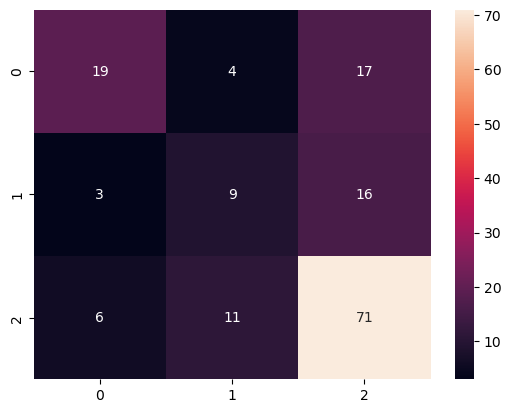

In [13]:
## Applying KNN Algorithm 
model3 = KNeighborsClassifier(n_neighbors=9 , metric= 'minkowski' , p = 4)
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)
test_accuracy3 = round(accuracy_score(y_test, y_pred3) * 100, 2)
print('Test Accuracy Score of KNN:',test_accuracy3)
conf3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(conf3, annot=True)
print(classification_report(y_test,y_pred3))

Test Accuracy Score of SVM : 63.46
              precision    recall  f1-score   support

      benign       0.68      0.38      0.48        40
   malignant       0.75      0.11      0.19        28
      normal       0.62      0.92      0.74        88

    accuracy                           0.63       156
   macro avg       0.68      0.47      0.47       156
weighted avg       0.66      0.63      0.58       156



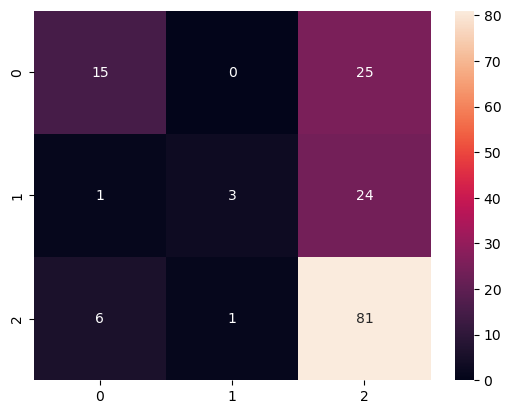

In [14]:
## Applying SVC Algorithm
model4 = SVC()
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
test_accuracy4 = round(accuracy_score(y_test, y_pred4) * 100, 2)
print('Test Accuracy Score of SVM :',test_accuracy4)
conf4 = confusion_matrix(y_test, y_pred4)
sns.heatmap(conf4, annot=True)
print(classification_report(y_test,y_pred4))

Test Accuracy Score of Decision Tree is : 59.62
              precision    recall  f1-score   support

      benign       0.51      0.45      0.48        40
   malignant       0.43      0.43      0.43        28
      normal       0.68      0.72      0.70        88

    accuracy                           0.60       156
   macro avg       0.54      0.53      0.53       156
weighted avg       0.59      0.60      0.59       156



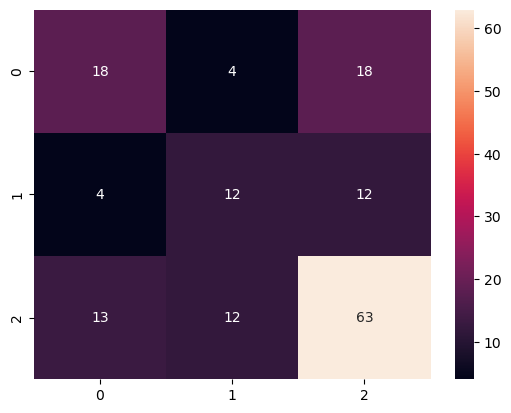

In [15]:
## Applying Decision Tree Classifier Algorithm
model5 = DecisionTreeClassifier()
model5.fit(x_train,y_train)
y_pred5 = model5.predict(x_test)
test_accuracy5 = round(accuracy_score(y_test, y_pred5) * 100, 2)
print('Test Accuracy Score of Decision Tree is :',test_accuracy5)
conf5 = confusion_matrix(y_test, y_pred5)
sns.heatmap(conf5, annot=True)
print(classification_report(y_test,y_pred5))

Test Accuracy Score of Naive Bayes: 49.36
              precision    recall  f1-score   support

      benign       0.34      0.60      0.44        40
   malignant       0.46      0.39      0.42        28
      normal       0.68      0.48      0.56        88

    accuracy                           0.49       156
   macro avg       0.49      0.49      0.47       156
weighted avg       0.55      0.49      0.50       156



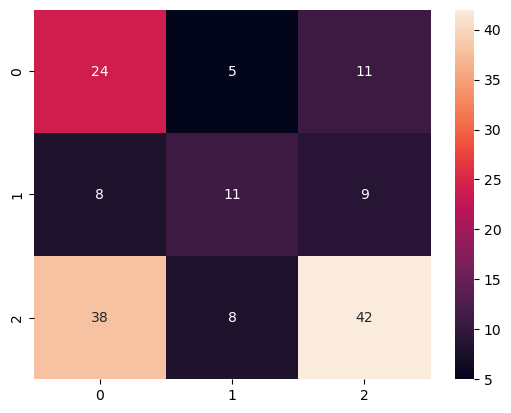

In [16]:
## Applying Naive Bayes Algorithm
model6 = GaussianNB()
model6.fit(x_train,y_train)
y_pred6 = model6.predict(x_test)
test_accuracy6 = round(accuracy_score(y_test, y_pred6) * 100, 2)
print('Test Accuracy Score of Naive Bayes:',test_accuracy6)
conf6 = confusion_matrix(y_test, y_pred6)
sns.heatmap(conf6, annot=True)
print(classification_report(y_test,y_pred6))